In [1]:
import matplotlib.pyplot as plt
import numpy as np

from the_well.benchmark.data import WellDataModule

In [2]:
dataloader = WellDataModule(
    well_base_path="/mnt/home/polymathic/ceph/the_well",
    well_dataset_name="euler_multi_quadrants_openBC",
    batch_size=4,
    n_steps_input=1,
    n_steps_output=100,
    data_workers=0,
    include_filters=["365_Dry_air"],
)

loader = dataloader.test_dataloader()

for i, batch in enumerate(loader):
    x0 = batch["input_fields"]
    traj = batch["output_fields"]

    if i == 0:
        break

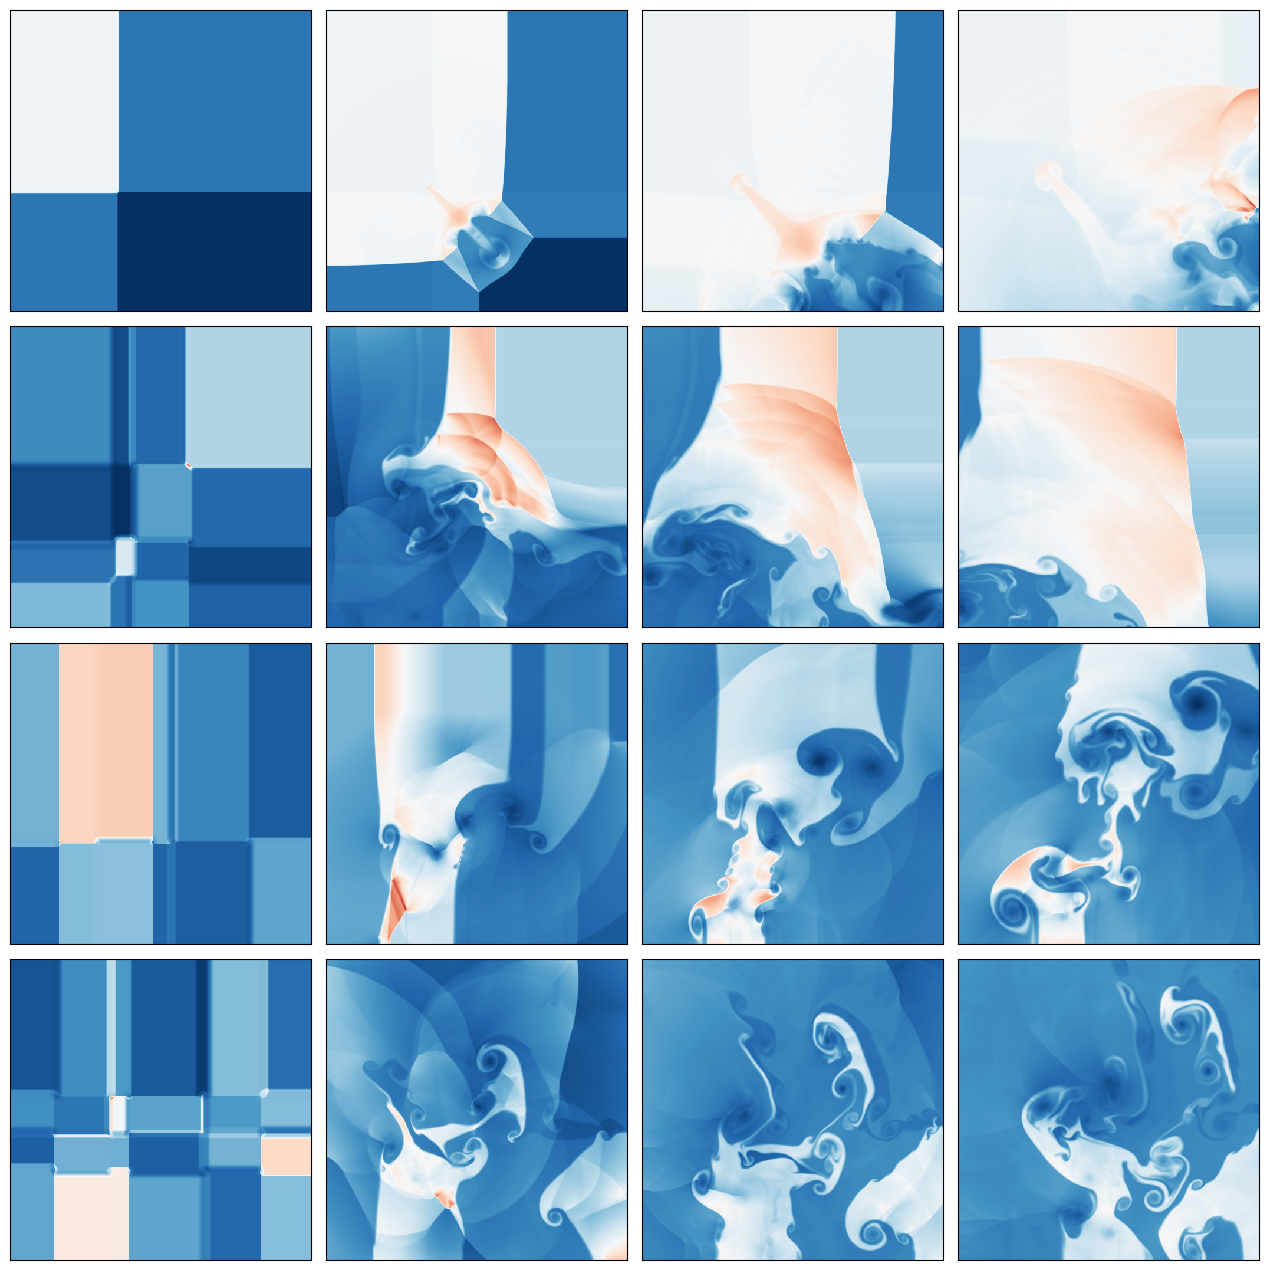

In [3]:
field = 1
fig, axs = plt.subplots(4, 4, figsize=(12.8, 12.8))

for i in range(4):
    vmin = np.nanmin(traj[i, ..., field])
    vmax = np.nanmax(traj[i, ..., field])

    for j, t in enumerate(range(0, 100, 25)):
        axs[i, j].imshow(
            traj[i, t, ..., field], cmap="RdBu_r", interpolation="none", vmin=vmin, vmax=vmax
        )
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()